Displays some common plots given paths to nonreference and reference OceanView USB2000+ Ocean Optics spectrometer data. See code comments for usage.

C:\Users\jrsha\AppData\Local\Temp\ipykernel_27232\3942995181.py:91: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(blackbody_radiation_curve, nonreference_df[nonreference_df['Wavelength (nm)'] > filter]['Wavelength (nm)'], nonreference_df[nonreference_df['Wavelength (nm)'] > filter]['Intensity'])


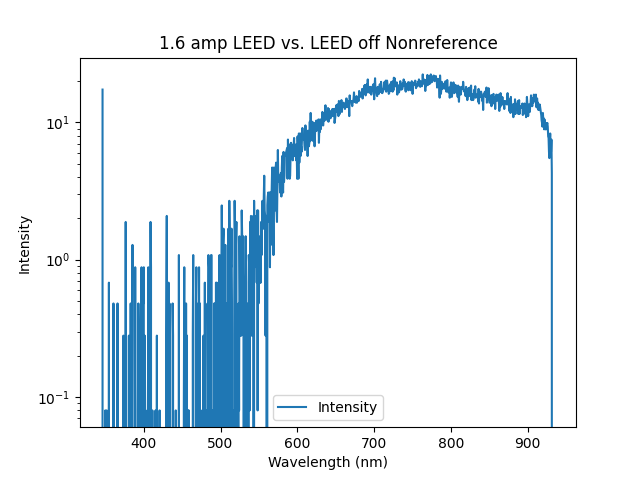

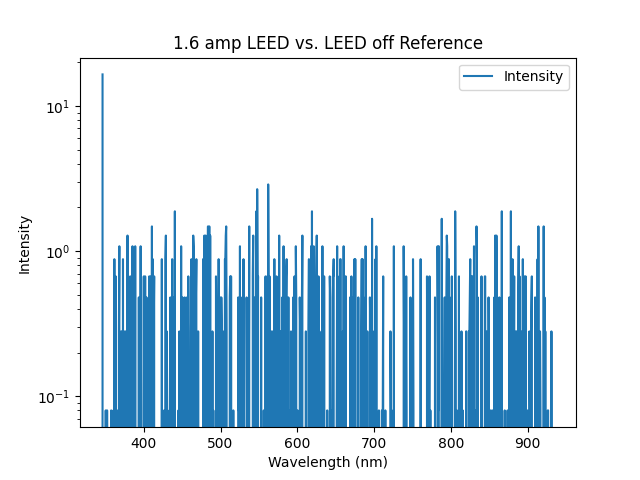

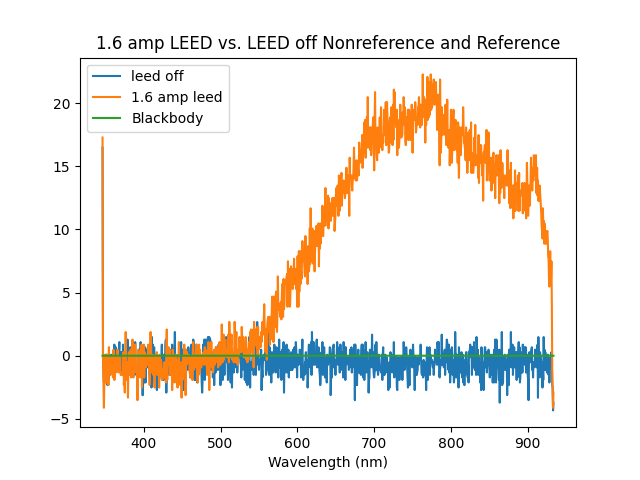

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.constants
import math
import numpy as np

#  Make the notebook display matplotlib graphs
%matplotlib widget

path_to_data_folder = "C:/Users/jrsha/UIUC/Abbamonte_research/Data" # folder where data is stored

### Given a file path to a tab-separated text file outputted by OceanView, reads the data into a dataframe 
###     renames columns to be more descriptive 
def read_ocean_optics(file_path):
    df = pd.read_csv(file_path, sep='\t')
    df.rename( columns={'Unnamed: 1':'Intensity'}, inplace=True )
    df.rename( columns={'QEP04302_1:101':'Wavelength (nm)'}, inplace=True )
    df.drop('Unnamed: 2', axis=1, inplace=True) # empty column remnant of how data is read

    # for xray room computer
    # df = pd.read_csv(file_path, header=None, sep='\t')
    # df.rename( columns={1:'Intensity'}, inplace=True )
    # df.rename( columns={0:'USB2+F01863_1:101 Wavelength (nm)'}, inplace=True )
    return df

### Displays plots that are common when given reference and nonreference data. 
### Parameters are path_to_nonreference_data followed by path_to_reference_data followed by experiment title.
def display_common_plots_for_nonreference_and_reference_data(path_to_nonreference_data, path_to_reference_data, title):
    nonreference_df = read_ocean_optics(path_to_nonreference_data)
    reference_df = read_ocean_optics(path_to_reference_data)

    nonreference_df.plot(x='Wavelength (nm)', kind='line', title=(title + " Nonreference"))
    plt.ylabel("Intensity")
    plt.yscale("log")

    reference_df.plot(x='Wavelength (nm)', kind='line', title=(title + " Reference"))
    plt.ylabel("Intensity")
    plt.yscale("log")

    display_plot_with_blackbody_fitted_to_nonreference(nonreference_df, reference_df, title)


### Displays plots that are common when given reference and nonreference data. 
### Parameters are nonreference_df followed by reference_df followed by experiment title.
def display_plot_with_blackbody_fitted_to_nonreference(nonreference_df, reference_df, title):
    def scale_func(x, a):
        return a * x
    

    # fit data ignoring saturated values
    # filter = 415
    # popt, _ = curve_fit(scale_func, nonreference_df[nonreference_df['Wavelength (nm)'] > filter]['Intensity'], reference_df[reference_df['Wavelength (nm)'] > filter]['Intensity'])

    # popt, _ = curve_fit(scale_func, nonreference_df['Intensity'], reference_df['Intensity'])


    nonreference_name = "1.6 amp leed"
    reference_name = "leed off"
    scaled_data_fitted_to_reference_df = reference_df.copy()
    scaled_data_fitted_to_reference_df.rename( columns={'Intensity': reference_name}, inplace=True )
    scaled_data_fitted_to_reference_df[nonreference_name] = nonreference_df['Intensity']
    # scaled_data_fitted_to_reference_df['Scaled Nonreference'] = nonreference_df['Intensity'] * popt[0]
    
    def blackbody_radiation_curve(wavelength, temperature):
        wavelength_m = wavelength * 1e-9  # Convert nm to m
    
        # Physical constants
        h = scipy.constants.Planck  # Planck's constant
        c = scipy.constants.speed_of_light  # Speed of light
        k = scipy.constants.Boltzmann  # Boltzmann constant

        # Blackbody radiation formula
        intensity = (
            # a * (2.0 * math.pi * h * c**2) / (wavelength_m**5) / 
            # (np.exp((h * c) / (wavelength_m * k * temperature)) - 1)

             (2.0 * math.pi * h * c**2) / (wavelength_m**5) *
            (np.exp(-(h * c) / (wavelength_m * k * temperature)))
        )
        return intensity
        
        # return a * 2.0 * math.pi * scipy.constants.Planck * math.pow(scipy.constants.speed_of_light, 2) / ((wavelength * math.pow(10,-9))**5) / math.exp(scipy.constants.Planck*scipy.constants.speed_of_light )
    # a * 2.0 * math.pi * scipy.constants.Planck * math.pow(scipy.constants.speed_of_light, 2) / wavelength
    # math.pow(wavelength * 10**-9,5) 
    # / (math.pow(math.e, scipy.constants.Planck*scipy.constants.speed_of_light/(wavelength*1.380*math.pow(10.0,-23)*temperature)) - 1)
    

    # fit data ignoring saturated values
    filter = 415
    popt, _ = curve_fit(blackbody_radiation_curve, nonreference_df[nonreference_df['Wavelength (nm)'] > filter]['Wavelength (nm)'], nonreference_df[nonreference_df['Wavelength (nm)'] > filter]['Intensity'])

    # print(blackbody_radiation_curve(300,10000))
    
    # scaled_data_fitted_to_reference_df['Blackbody curve at temperature'] = [2 * math.pi * scipy.constants.Planck * 
    #                                                                                            math.pow(scipy.constants.speed_of_light, 2) / 
    #                                                                                            (math.pow(wavelength,5) / 
    #                                                                                             math.pow(math.e, scipy.constants.Planck*scipy.constants.speed_of_light/
    #                                                                                                      (wavelength*1.380*math.pow(10,-23)*popt)) - 1) for wavelength in nonreference_df['Wavelength (nm)']]
    # plt.plot(nonreference_df['Wavelength (nm)'], blackbody_radiation_curve(nonreference_df['Wavelength (nm)'], popt[0], popt[1]), 'r-', label='fit: a=' )
    scaled_data_fitted_to_reference_df['Blackbody'] = [blackbody_radiation_curve(wv, popt[0]) for wv in nonreference_df['Wavelength (nm)']]
    scaled_data_fitted_to_reference_df.plot(x='Wavelength (nm)', kind='line', title=(title + " Nonreference and Reference"))
    # plt.yscale("log")
    
    # diff = reference_df.copy()
    # diff['Intensity'] = scaled_data_fitted_to_reference_df['Nonreference'] - scaled_data_fitted_to_reference_df['Reference']
    # diff.plot(x='Wavelength (nm)', kind='line', title=(title + " Difference Nonreference Scaled to Reference"))
    
    # plt.xlim(594, 630)
# display common plots usage
display_common_plots_for_nonreference_and_reference_data((path_to_data_folder + "/1.21/1.6amps1.txt"), 
                                                         (path_to_data_folder + "/1.21/noleed1.txt"), 
                                                         "1.6 amp LEED vs. LEED off")


# stilbene_uv_df = read_ocean_optics(path_to_data_folder + "/12.17/ex2_stilbene_uv_center.txt")
# stilbene_nouv_df = read_ocean_optics(path_to_data_folder + "/12.17/ex2_stilbene_nouv1.txt")
# kimtech_uv_df = read_ocean_optics(path_to_data_folder + "/12.17/ex2_kimtech_uv_center.txt")
# kimtech_nouv_df = read_ocean_optics(path_to_data_folder + "/12.17/ex2_kimtech_nouv.txt")


# def plot_blackbody_radiation(temp):
    

# nonreference_df = stilbene_uv_df - stilbene_nouv_df 
# reference_df = kimtech_uv_df - kimtech_nouv_df

# display_plot_of_scaled_data_fitted_to_reference(nonreference_df, reference_df, "Stilbene and Kimtech with no UV subtracted")

scale 1.8846744637862194e-12 temp 3643.0068109308518


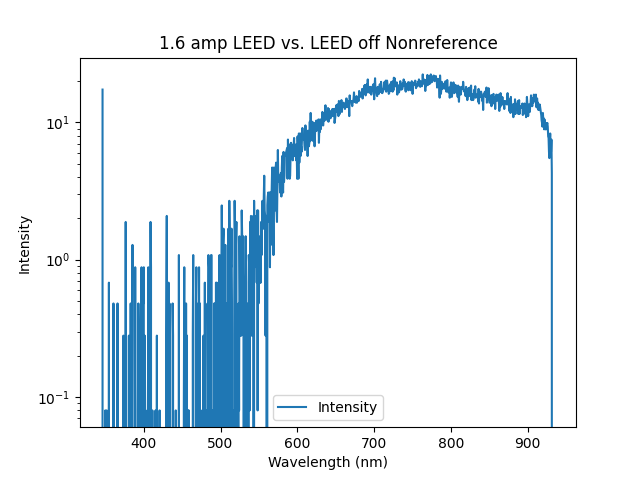

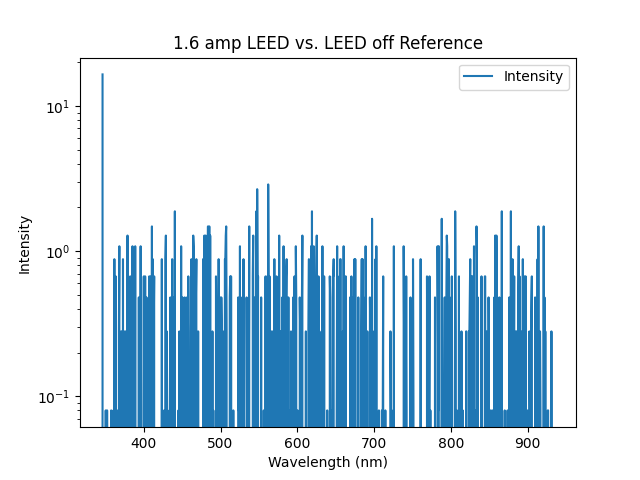

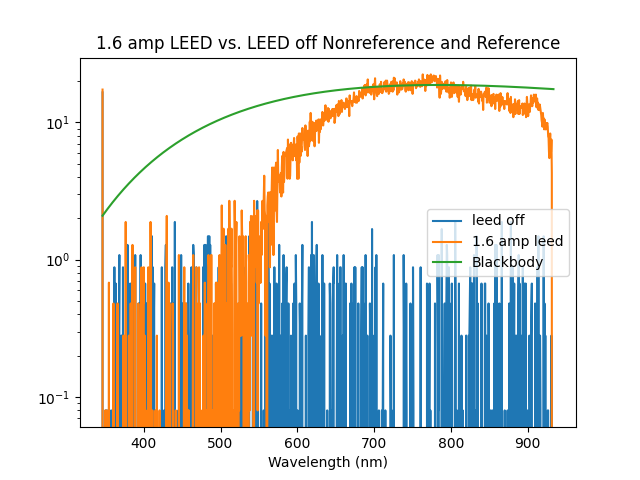

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.constants
import math
import numpy as np

#  Make the notebook display matplotlib graphs
%matplotlib widget

path_to_data_folder = "C:/Users/jrsha/UIUC/Abbamonte_research/Data" # folder where data is stored

### Given a file path to a tab-separated text file outputted by OceanView, reads the data into a dataframe 
###     renames columns to be more descriptive 
def read_ocean_optics(file_path):
    df = pd.read_csv(file_path, sep='\t')
    df.rename( columns={'Unnamed: 1':'Intensity'}, inplace=True )
    df.rename( columns={'QEP04302_1:101':'Wavelength (nm)'}, inplace=True )
    df.drop('Unnamed: 2', axis=1, inplace=True) # empty column remnant of how data is read

    # for xray room computer
    # df = pd.read_csv(file_path, header=None, sep='\t')
    # df.rename( columns={1:'Intensity'}, inplace=True )
    # df.rename( columns={0:'USB2+F01863_1:101 Wavelength (nm)'}, inplace=True )
    return df

### Displays plots that are common when given reference and nonreference data. 
### Parameters are path_to_nonreference_data followed by path_to_reference_data followed by experiment title.
def display_common_plots_for_nonreference_and_reference_data(path_to_nonreference_data, path_to_reference_data, title):
    nonreference_df = read_ocean_optics(path_to_nonreference_data)
    reference_df = read_ocean_optics(path_to_reference_data)

    nonreference_df.plot(x='Wavelength (nm)', kind='line', title=(title + " Nonreference"))
    plt.ylabel("Intensity")
    plt.yscale("log")

    reference_df.plot(x='Wavelength (nm)', kind='line', title=(title + " Reference"))
    plt.ylabel("Intensity")
    plt.yscale("log")

    display_plot_with_blackbody_fitted_to_nonreference(nonreference_df, reference_df, title)


### Displays plots that are common when given reference and nonreference data. 
### Parameters are nonreference_df followed by reference_df followed by experiment title.
def display_plot_with_blackbody_fitted_to_nonreference(nonreference_df, reference_df, title):

    nonreference_name = "1.6 amp leed"
    reference_name = "leed off"
    blackbody_data_fitted_to_reference_df = reference_df.copy()
    blackbody_data_fitted_to_reference_df.rename( columns={'Intensity': reference_name}, inplace=True )
    blackbody_data_fitted_to_reference_df[nonreference_name] = nonreference_df['Intensity']
    
    def blackbody_radiation_curve(wavelength, a, temperature):
        wavelength_m = wavelength * 1e-9  # Convert nm to m
    
        # Constants
        h = scipy.constants.Planck  
        c = scipy.constants.speed_of_light  
        k = scipy.constants.Boltzmann  

        # Intensity (to be scaled by a)
        intensity = a * (2.0 * np.pi * h * c**2) / (wavelength_m**5) / (np.exp((h * c) / (wavelength_m * k * temperature)) - 1)
        # (
        #     a * (2.0 * math.pi * h * c**2) / (wavelength_m**5) *
        #     (np.exp(-(h * c) / (wavelength_m * k * temperature)))
        # )
        return intensity

    # fit data ignoring saturated values
    filter = 600
    popt, _ = curve_fit(blackbody_radiation_curve, nonreference_df[nonreference_df['Wavelength (nm)'] > filter]['Wavelength (nm)'], nonreference_df[nonreference_df['Wavelength (nm)'] > filter]['Intensity'], p0=[1e-12, 3000])

    print("scale", popt[0], "temp", popt[1])
    blackbody_data_fitted_to_reference_df['Blackbody'] = [blackbody_radiation_curve(wv, 2.09214149718768e-12, 3700) for wv in nonreference_df['Wavelength (nm)']]
    blackbody_data_fitted_to_reference_df.plot(x='Wavelength (nm)', kind='line', title=(title + " Nonreference and Reference"))
    # plt.yscale("log")
    
display_common_plots_for_nonreference_and_reference_data((path_to_data_folder + "/1.21/1.6amps1.txt"), 
                                                         (path_to_data_folder + "/1.21/noleed1.txt"), 
                                                         "1.6 amp LEED vs. LEED off")


max_wavelength 763.489 temperature 3795.7324859952137


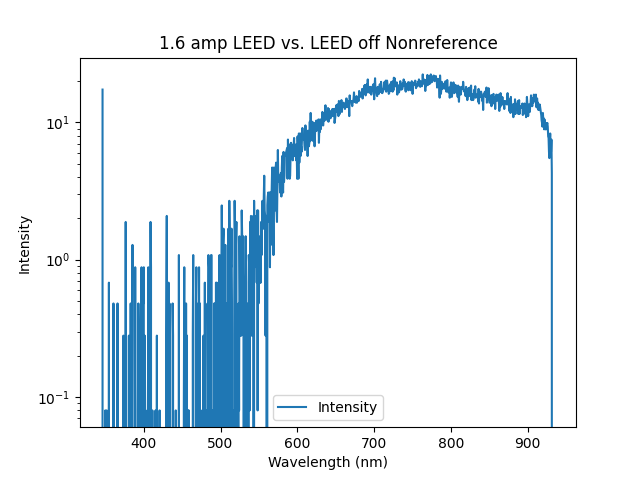

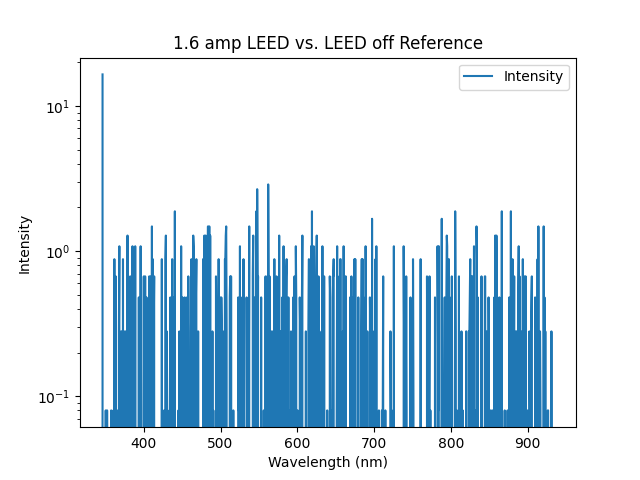

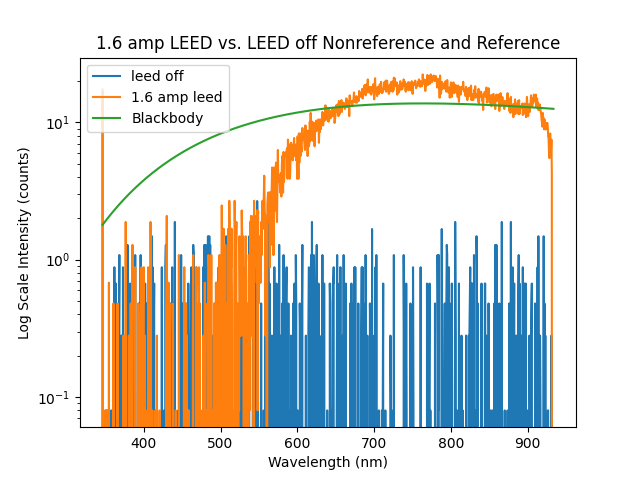

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
import scipy.constants
import math
import numpy as np

#  Make the notebook display matplotlib graphs
%matplotlib widget

path_to_data_folder = "C:/Users/jrsha/UIUC/Abbamonte_research/Data" # folder where data is stored

### Given a file path to a tab-separated text file outputted by OceanView, reads the data into a dataframe 
###     renames columns to be more descriptive 
def read_ocean_optics(file_path):
    df = pd.read_csv(file_path, sep='\t')
    df.rename( columns={'Unnamed: 1':'Intensity'}, inplace=True )
    df.rename( columns={'QEP04302_1:101':'Wavelength (nm)'}, inplace=True )
    df.drop('Unnamed: 2', axis=1, inplace=True) # empty column remnant of how data is read

    # for xray room computer
    # df = pd.read_csv(file_path, header=None, sep='\t')
    # df.rename( columns={1:'Intensity'}, inplace=True )
    # df.rename( columns={0:'USB2+F01863_1:101 Wavelength (nm)'}, inplace=True )
    return df

### Displays plots that are common when given reference and nonreference data. 
### Parameters are path_to_nonreference_data followed by path_to_reference_data followed by experiment title.
def display_common_plots_for_nonreference_and_reference_data(path_to_nonreference_data, path_to_reference_data, title):
    nonreference_df = read_ocean_optics(path_to_nonreference_data)
    reference_df = read_ocean_optics(path_to_reference_data)

    nonreference_df.plot(x='Wavelength (nm)', kind='line', title=(title + " Nonreference"))
    plt.ylabel("Intensity")
    plt.yscale("log")

    reference_df.plot(x='Wavelength (nm)', kind='line', title=(title + " Reference"))
    plt.ylabel("Intensity")
    plt.yscale("log")

    display_plot_with_blackbody_fitted_to_nonreference(nonreference_df, reference_df, title)


### Displays plots that are common when given reference and nonreference data. 
### Parameters are nonreference_df followed by reference_df followed by experiment title.
def display_plot_with_blackbody_fitted_to_nonreference(nonreference_df, reference_df, title):

    nonreference_name = "1.6 amp leed"
    reference_name = "leed off"
    blackbody_data_fitted_to_reference_df = reference_df.copy()
    blackbody_data_fitted_to_reference_df.rename( columns={'Intensity': reference_name}, inplace=True )
    blackbody_data_fitted_to_reference_df[nonreference_name] = nonreference_df['Intensity']


    filter = 500 # in nm

    max_intensity_index = nonreference_df[nonreference_df['Wavelength (nm)'] > filter]['Intensity'].idxmax()
    max_wavelength = nonreference_df.loc[max_intensity_index, 'Wavelength (nm)']

    temperature = 2.898e-3 / (max_wavelength * 1e-9)

    print("max_wavelength", max_wavelength, "temperature", temperature)

    def blackbody_radiation_curve(wavelength, a):
        wavelength_m = wavelength * 1e-9  # Convert nm to m
    
        # Constants
        h = scipy.constants.Planck  
        c = scipy.constants.speed_of_light  
        k = scipy.constants.Boltzmann  

        # Intensity (to be scaled by a)
        intensity = (
            a * (2.0 * np.pi * h * c**2) / (wavelength_m**5) / (np.exp((h * c) / (wavelength_m * k * temperature)) - 1)
        )
        return intensity

    # fit data ignoring saturated values

    popt, _ = curve_fit(blackbody_radiation_curve, nonreference_df[nonreference_df['Wavelength (nm)'] > filter]['Wavelength (nm)'], nonreference_df[nonreference_df['Wavelength (nm)'] > filter]['Intensity'])


    blackbody_data_fitted_to_reference_df['Blackbody'] = [blackbody_radiation_curve(wv, popt[0]) for wv in nonreference_df['Wavelength (nm)']]
    blackbody_data_fitted_to_reference_df.plot(x='Wavelength (nm)', kind='line', title=(title + " Nonreference and Reference"))
    plt.ylabel("Log Scale Intensity (counts)")
    plt.yscale("log")
    
display_common_plots_for_nonreference_and_reference_data((path_to_data_folder + "/1.21/1.6amps1.txt"), 
                                                         (path_to_data_folder + "/1.21/noleed1.txt"), 
                                                         "1.6 amp LEED vs. LEED off")
